In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('creditcard.csv')

In [29]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


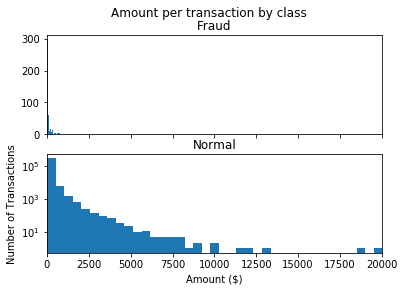

In [50]:
fraud = dataset[dataset.Class == 1]
normal = dataset[dataset.Class == 0]

 

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

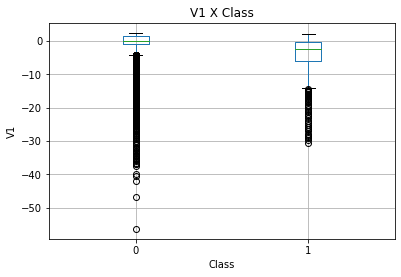

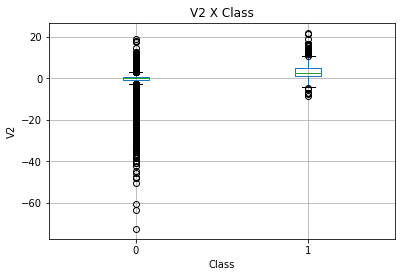

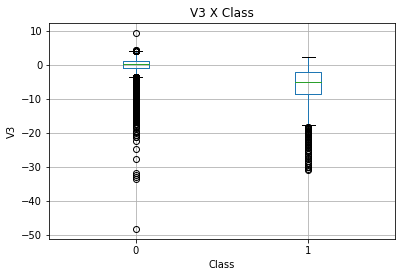

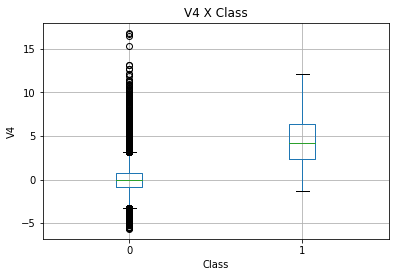

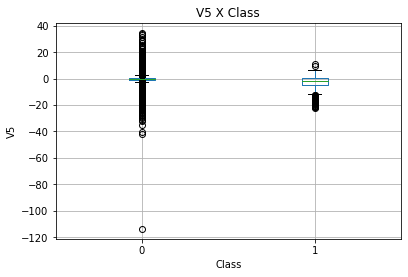

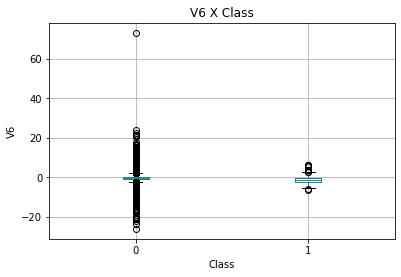

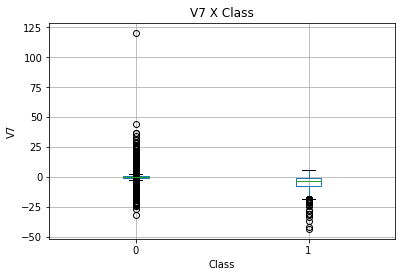

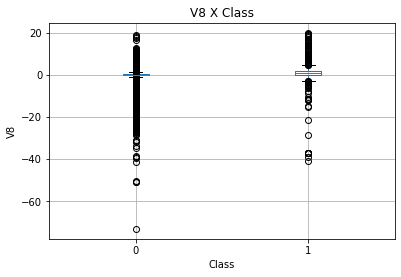

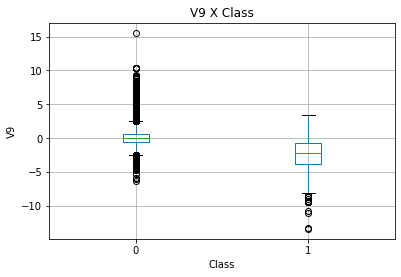

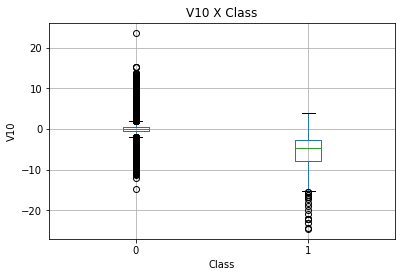

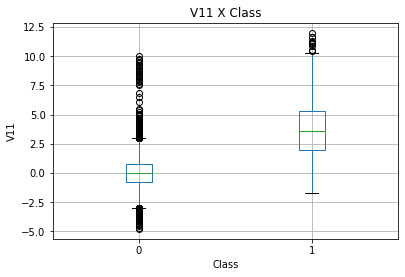

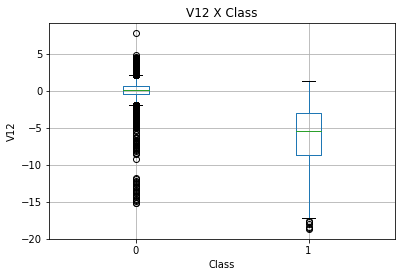

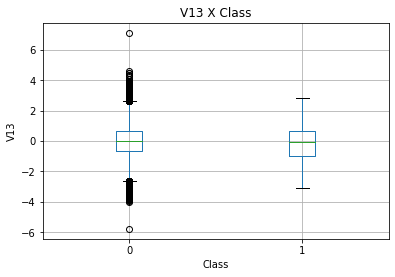

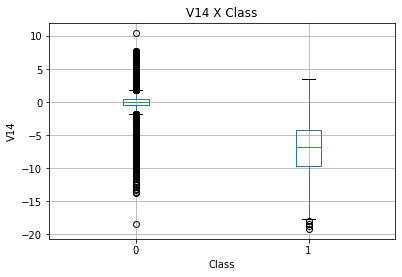

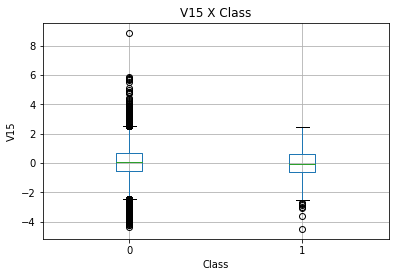

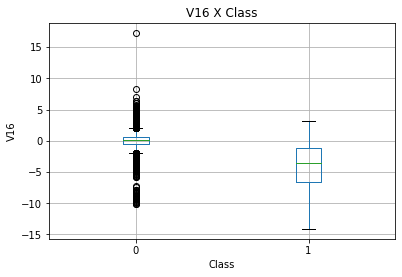

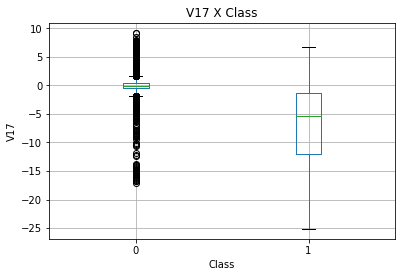

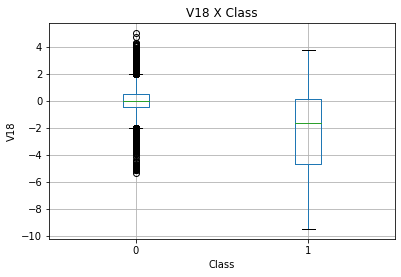

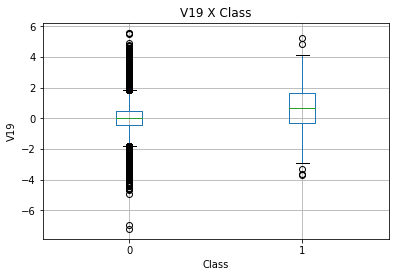

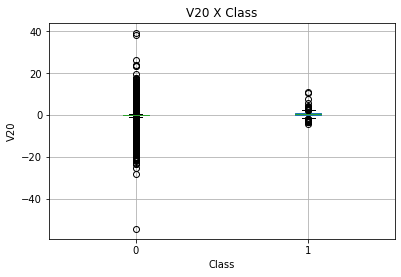

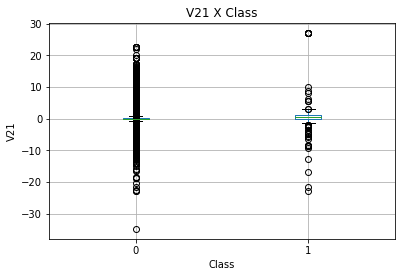

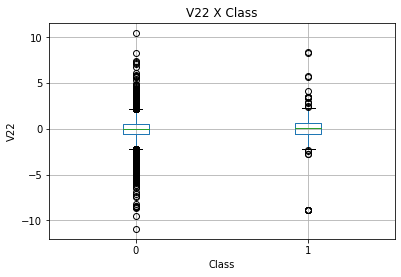

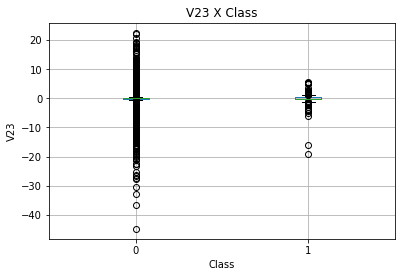

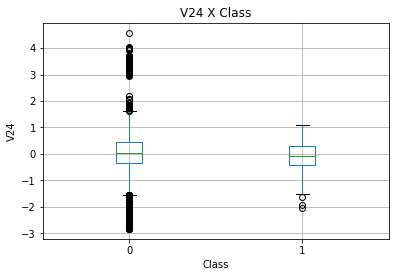

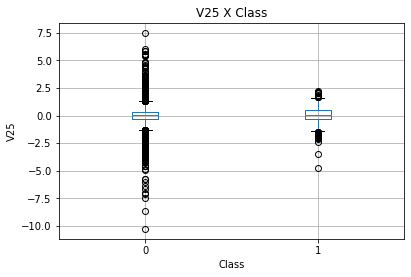

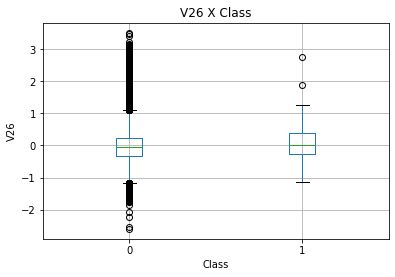

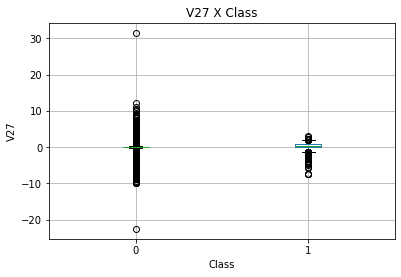

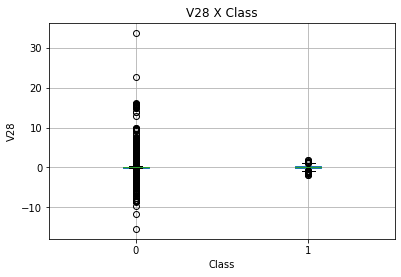

In [27]:
columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]
for e in columns:
    dataset.boxplot(column=e, by="Class")
    plt.title(f'{e} X Class')
    plt.ylabel(f"{e}")
    plt.xlabel('Class')
    plt.suptitle("")
    plt.show();

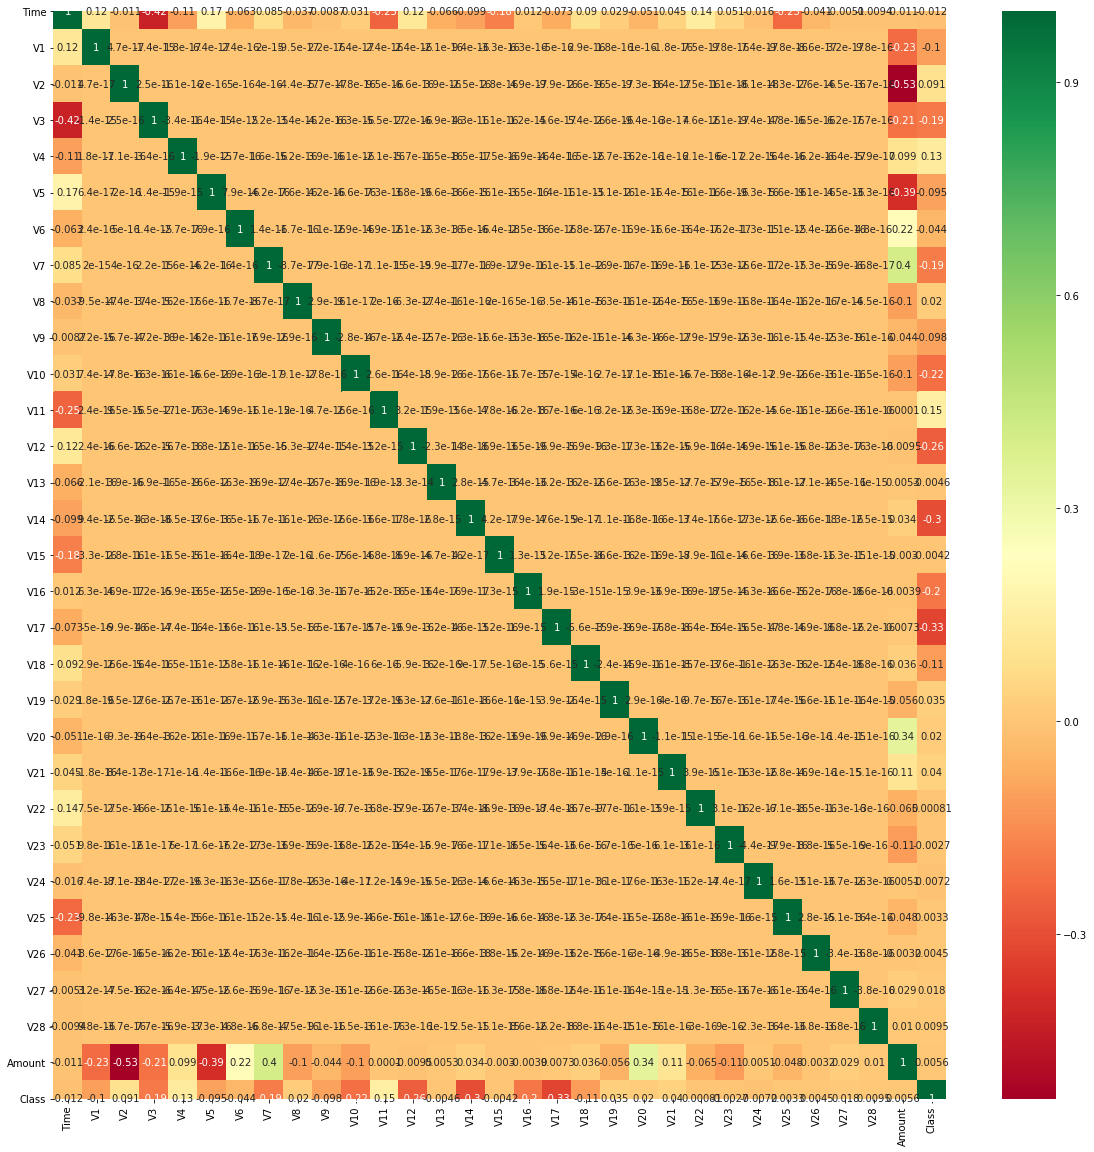

In [76]:
corrMatrix = dataset.corr()
index = corrMatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[index].corr(),annot=True,cmap="RdYlGn")

In [86]:
falseClass = dataset.loc[dataset.Class == 0]
trueClass = dataset.loc[dataset.Class == 1]
sizeTrue = trueClass.shape[0]
reducedFalse = falseClass.sample(sizeTrue)

In [87]:
result = pd.concat([trueClass, reducedFalse], ignore_index=True, sort=True).sample(frac=1)

In [88]:
result

,Amount,Class,Time,V1,V10,V11,V12,V13,V14,V15,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
87,717.15,1,32745.0,-2.179135,-3.582810,1.975821,-3.500542,0.170681,-2.735940,1.670251,...,0.691775,0.196779,0.241085,-2.182733,2.572046,-3.663733,0.081568,0.268049,0.660437,-2.374027
443,1.00,1,152058.0,-3.576362,-2.497561,4.604170,-9.001915,-1.276324,-13.969471,1.256945,...,0.359841,-2.651825,0.422184,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363
695,1.00,0,113131.0,2.065473,0.076617,0.460747,0.566277,-0.439049,0.745245,0.339578,...,-0.432905,-0.000970,-0.063931,-1.656720,-0.055431,0.494001,-0.231099,0.002986,-0.060374,0.601354
624,6.49,0,139078.0,1.911997,0.153687,0.751720,0.756637,-0.653979,-0.023866,-0.061435,...,0.339634,-0.006896,-0.048452,0.194172,0.402696,-1.101112,-0.111378,-1.040797,0.243899,1.268244
318,1.00,1,94362.0,-26.457745,-22.187089,4.419997,-10.592305,-0.703796,-3.926207,-2.400246,...,-0.966564,-7.263482,-1.324884,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,1.00,0,165602.0,-0.950499,-1.002104,-1.553386,-0.260120,-0.166741,0.343127,1.414973,...,-0.592749,0.230700,0.073621,1.370623,-0.461400,-0.158258,-0.003193,0.040309,0.587365,0.140495
934,49.99,0,159351.0,-1.119276,0.533000,1.252336,-0.419097,-1.699656,-0.936388,0.321974,...,-0.308629,-1.015079,-0.443671,-0.834981,-0.343622,0.455296,-0.802962,0.887026,-1.314279,0.742390
526,170.93,0,43055.0,-2.953738,-0.573229,1.142077,2.055429,0.959799,-0.191063,-0.720217,...,-1.086042,0.945001,0.293254,0.178002,-4.280787,-1.710735,-0.908795,-0.267538,-1.337113,1.082836
630,250.00,0,117117.0,1.628884,-1.327780,0.011536,-0.418960,0.123192,-2.862689,0.601813,...,0.652570,-0.112869,0.045193,-3.337938,0.753724,0.941297,-1.317513,0.877787,-0.445028,0.132562


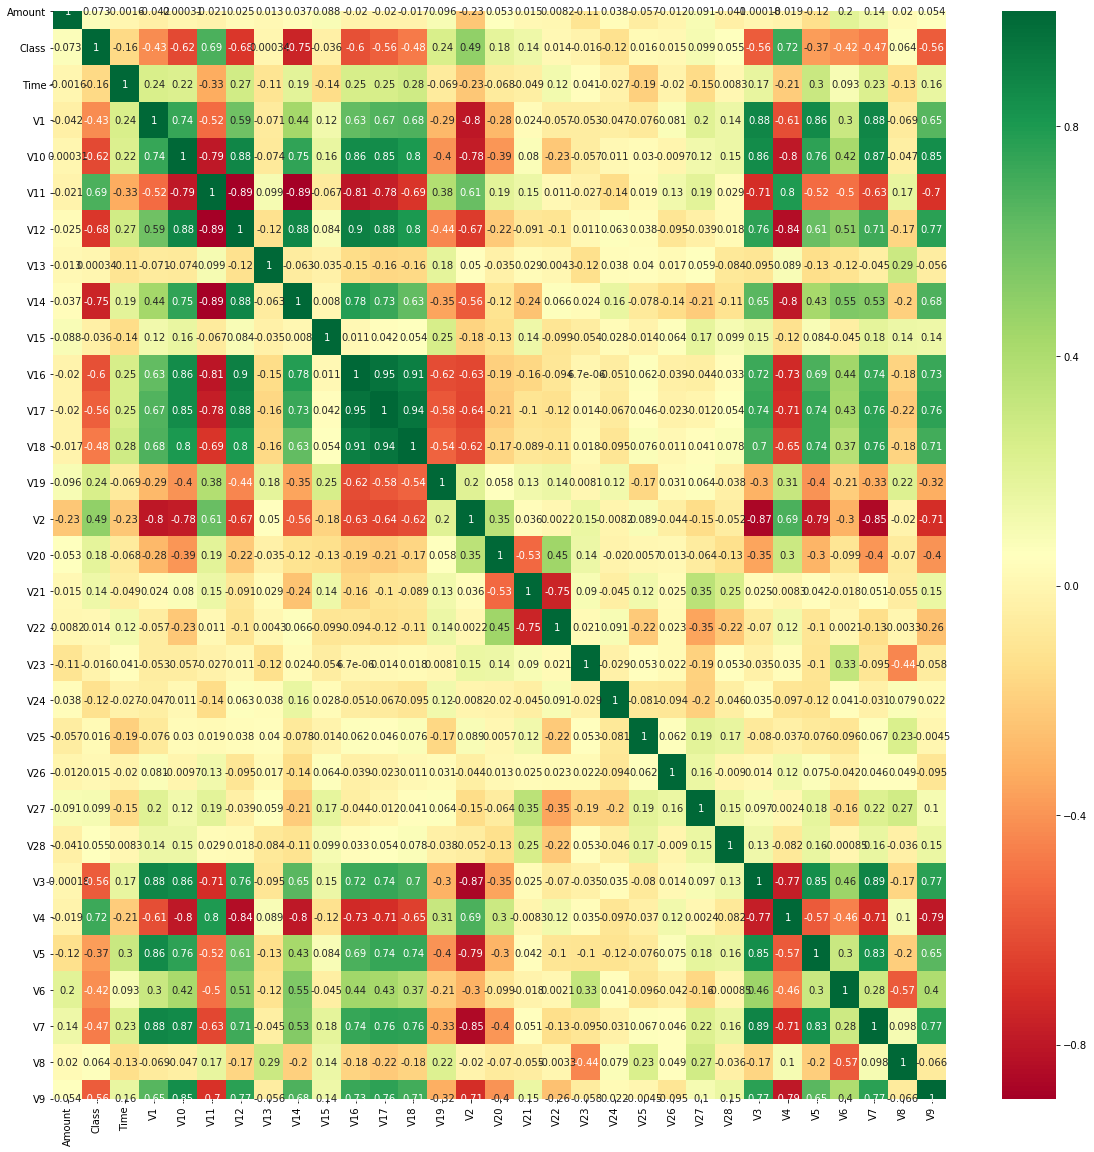

In [92]:
corrMatrix = result.corr()
index = corrMatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(result[index].corr(),annot=True,cmap="RdYlGn")

In [117]:
j = result.columns[abs(result[index].corr()['Class']) > 0.5][1::]

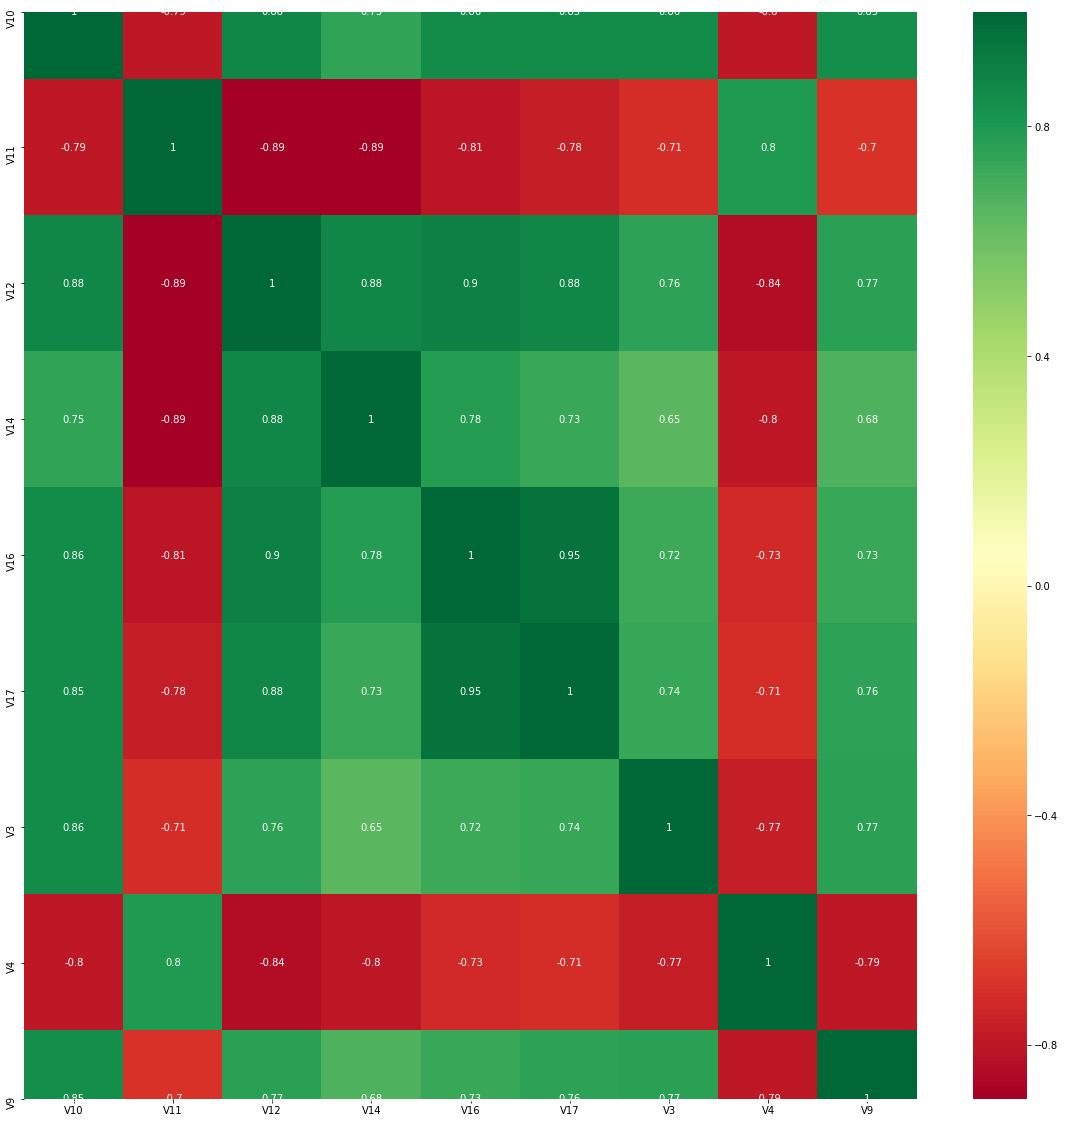

In [118]:
corrMatrix = result.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(result[j].corr(),annot=True,cmap="RdYlGn")

In [124]:
dataset[j].corr()

,V10,V11,V12,V14,V16,V17,V3,V4,V9
V10,1.000000e+00,2.624448e-16,1.439907e-15,2.622513e-16,-1.705923e-15,3.674182e-15,6.289267e-16,6.055490e-16,-2.771761e-16
V11,2.624448e-16,1.000000e+00,3.176029e-15,3.637160e-17,-6.173867e-16,8.719713e-16,-5.501758e-17,-2.083600e-16,4.682341e-16
V12,1.439907e-15,3.176029e-15,1.000000e+00,1.761652e-16,3.530418e-16,-9.869814e-16,2.206522e-16,-5.657963e-16,-2.445230e-15
V14,2.622513e-16,3.637160e-17,1.761652e-16,1.000000e+00,7.910367e-17,4.626140e-15,4.271336e-16,-8.522435e-17,2.343317e-16
V16,-1.705923e-15,-6.173867e-16,3.530418e-16,7.910367e-17,1.000000e+00,1.854297e-15,1.183364e-15,-6.939204e-16,-3.251906e-16
V17,3.674182e-15,8.719713e-16,-9.869814e-16,4.626140e-15,1.854297e-15,1.000000e+00,4.576619e-17,-4.397925e-16,6.535992e-16
V3,6.289267e-16,-5.501758e-17,2.206522e-16,4.271336e-16,1.183364e-15,4.576619e-17,1.000000e+00,-3.416910e-16,-4.233770e-16
V4,6.055490e-16,-2.083600e-16,-5.657963e-16,-8.522435e-17,-6.939204e-16,-4.397925e-16,-3.416910e-16,1.000000e+00,3.859585e-16
V9,-2.771761e-16,4.682341e-16,-2.445230e-15,2.343317e-16,-3.251906e-16,6.535992e-16,-4.233770e-16,3.859585e-16,1.000000e+00


In [129]:
dataset.transform('sum')

ValueError: transforms cannot produce aggregated results